<a href="https://colab.research.google.com/github/Worlddatascience/DataScienceCohort/blob/master/Project%2017%20-%20Deep_Learning_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

- Python 3.6.2 (NOT python 3.7)
- Sign up for an Intrinio account at https://intrinio.com/ and obtain an API key. Subscription to the 'US Fundamentals and Stock Prices' subscription (free, trial or paid) is required.

Python libaries:
- TensorFlow r1.13 
- keras
- requests
- pandas
- matplotlib
- seaborn

# A deep learning price prediction model with TensorFlow

## Download the dataset

In [1]:
import requests

BASE_URL = 'https://api-v2.intrinio.com'

# REPLACE YOUR INTRINIO API KEY HERE!
INTRINIO_API_KEY = 'OjRjMWE1NTI1ZWNhZGNmMzA4NGU3YjNmMTAxY2MwZTM2' #use the API KEY - SANDBOX

def query_intrinio(path, **kwargs):   
    url = '%s%s'%(BASE_URL, path)
    kwargs['api_key'] = INTRINIO_API_KEY
    response = requests.get(url, params=kwargs)

    status_code = response.status_code
    if status_code == 401: 
        raise Exception('API key is invalid!')
    if status_code == 429: 
        raise Exception('Page limit hit! Try again in 1 minute')
    if status_code != 200: 
        raise Exception('Request failed with status %s'%status_code)

    return response.json()

In [2]:
import pandas as pd
from pandas.io.json import json_normalize

def get_technicals(ticker, indicator, **kwargs):    
    url_pattern = '/securities/%s/prices/technicals/%s'
    path = url_pattern%(ticker, indicator)
    json_data = query_intrinio(path, **kwargs)

    df = json_normalize(json_data.get('technicals'))    
    df['date_time'] = pd.to_datetime(df['date_time'])
    df = df.set_index('date_time')
    df.index = df.index.rename('date')
    return df

In [3]:
ticker = 'AAPL'
query_params = {'start_date': '2013-01-01', 'end_date': '2018-12-31', 'page_size': 365*6}

In [4]:
# Run the following lines at one-minute intervals!

In [5]:
df_rsi = get_technicals(ticker, 'rsi', **query_params) #RUN AND WAIT 1 MINUTE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [6]:
df_wr = get_technicals(ticker, 'wr', **query_params) #RUN AND WAIT 30 seconds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [8]:
df_vwap = get_technicals(ticker, 'vwap', **query_params)  #RUN AND WAIT 30 SECONDS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [9]:
df_adtv = get_technicals(ticker, 'adtv', **query_params) #RUN AND WAIT 30 SECONDS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [10]:
df_ao = get_technicals(ticker, 'ao', **query_params)  #RUN AND WAIT 30 SECONDS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [11]:
df_sma_5d = get_technicals(ticker, 'sma', period=5, **query_params) #RUN AND WAIT 30 SECONDS
df_sma_5d = df_sma_5d.rename(columns={'sma':'sma_5d'}) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [12]:
df_sma_15d = get_technicals(ticker, 'sma', period=15, **query_params) #RUN AND WAIT 30 SECONDS
df_sma_15d = df_sma_15d.rename(columns={'sma':'sma_15d'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [13]:
df_sma_30d = get_technicals(ticker, 'sma', period=30, **query_params)  #RUN AND WAIT 30 SECONDS
df_sma_30d = df_sma_30d.rename(columns={'sma':'sma_30d'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [ ]:
 #WAIT 30 SECONDS

In [14]:
def get_prices(ticker, tag, **params):
    url_pattern = '/securities/%s/historical_data/%s'
    path = url_pattern%(ticker, tag)
    json_data = query_intrinio(path, **params)

    df = json_normalize(json_data.get('historical_data'))    
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df.index = df.index.rename('date')
    return df.rename(columns={'value':tag})

In [15]:
df_close = get_prices(ticker, 'adj_close_price', **query_params)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [16]:
df_target = df_close.shift(1).dropna()

In [17]:
#You must convert df_target.index using tz_localize('Etc/UCT') before joining all dataframes

df_target.index = pd.to_datetime(df_target.index).tz_localize('Etc/UCT')



In [18]:
df = df_rsi.join(df_wr).join(df_vwap).join(df_adtv)\
    .join(df_ao).join(df_sma_5d).join(df_sma_15d)\
    .join(df_sma_30d).join(df_target).dropna()

In [19]:
df.head(1)

,rsi,wr,vwap,adtv,ao,sma_5d,sma_15d,sma_30d,adj_close_price
date,,,,,,,,,
2018-12-28 00:00:00+00:00,35.88289,-62.894534,216.376505,4.693932e+07,-21.924007,153.422,161.806,171.163333,38.585062


## Workaround when Intrinio API key have expired

This section is optional.

When the given Intrinio API key expires, the above codes will fail to fetch from the server.
As a temporary workaround, load the dataset from disk.

In [ ]:
df = pd.read_pickle('files/chapter11/df_independent_2013_2018')
df.head(1)

In [ ]:
df_close = pd.read_pickle('files/chapter11/df_aapl_2013_2018')
df_close.head(1)

## Splitting and scaling the data

In [20]:
df_train = df['2017':'2013']
df_test = df['2018']

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data = scaler.fit_transform(df_train.values)
test_data = scaler.transform(df_test.values)

In [22]:
x_train = train_data[:, :-1]
y_train = train_data[:, -1]

In [23]:
x_test = test_data[:, :-1]

## Building an artificial neural network with TensorFlow

### Phase 1: Assembling the graph

In [ ]:
pip install tensorflow==1.14 #For this code to work you must use this version of TensorFlow

In [ ]:
import tensorflow as tf


In [26]:
num_features = x_train.shape[1]



In [27]:
x = tf.placeholder(dtype=tf.float32, shape=[None, num_features])
y = tf.placeholder(dtype=tf.float32, shape=[None])

In [28]:
nl_1, nl_2, nl_3, nl_4 = 512, 256, 128, 64

In [29]:
wi = tf.contrib.layers.variance_scaling_initializer(
    mode='FAN_AVG', uniform=True, factor=1)
zi = tf.zeros_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [30]:
# 4 Hidden layers
wt_hidden_1 = tf.Variable(wi([num_features, nl_1]))
bias_hidden_1 = tf.Variable(zi([nl_1]))

wt_hidden_2 = tf.Variable(wi([nl_1, nl_2]))
bias_hidden_2 = tf.Variable(zi([nl_2]))

wt_hidden_3 = tf.Variable(wi([nl_2, nl_3]))
bias_hidden_3 = tf.Variable(zi([nl_3]))

wt_hidden_4 = tf.Variable(wi([nl_3, nl_4]))
bias_hidden_4 = tf.Variable(zi([nl_4]))

# Output layer
wt_out = tf.Variable(wi([nl_4, 1]))
bias_out = tf.Variable(zi([1]))

In [31]:
hidden_1 = tf.nn.relu(
    tf.add(tf.matmul(x, wt_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(
    tf.add(tf.matmul(hidden_1, wt_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(
    tf.add(tf.matmul(hidden_2, wt_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(
    tf.add(tf.matmul(hidden_3, wt_hidden_4), bias_hidden_4))
out = tf.transpose(tf.add(tf.matmul(hidden_4, wt_out), bias_out))

In [32]:
mse = tf.reduce_mean(tf.squared_difference(out, y)) 

In [33]:
optimizer = tf.train.AdamOptimizer().minimize(mse)

## Phase 2: training our model

In [34]:
session = tf.InteractiveSession()

In [35]:
session.run(tf.global_variables_initializer())

In [36]:
from numpy import arange
from numpy.random import permutation

BATCH_SIZE = 100
EPOCHS = 100

for epoch in range(EPOCHS):
    # Shuffle the training data
    shuffle_data = permutation(arange(len(y_train)))
    x_train = x_train[shuffle_data]
    y_train = y_train[shuffle_data]

    # Mini-batch training
    for i in range(len(y_train)//BATCH_SIZE):
        start = i*BATCH_SIZE
        batch_x = x_train[start:start+BATCH_SIZE]
        batch_y = y_train[start:start+BATCH_SIZE]
        session.run(optimizer, feed_dict={x: batch_x, y: batch_y})

In [37]:
[predicted_values] = session.run(out, feed_dict={x: x_test})

In [38]:
predicted_scaled_data = test_data.copy()
predicted_scaled_data[:, -1] = predicted_values
predicted_values = scaler.inverse_transform(predicted_scaled_data)

In [39]:
predictions = predicted_values[:, -1][::-1]
actual = df_close['2018']['adj_close_price'].values[::-1]

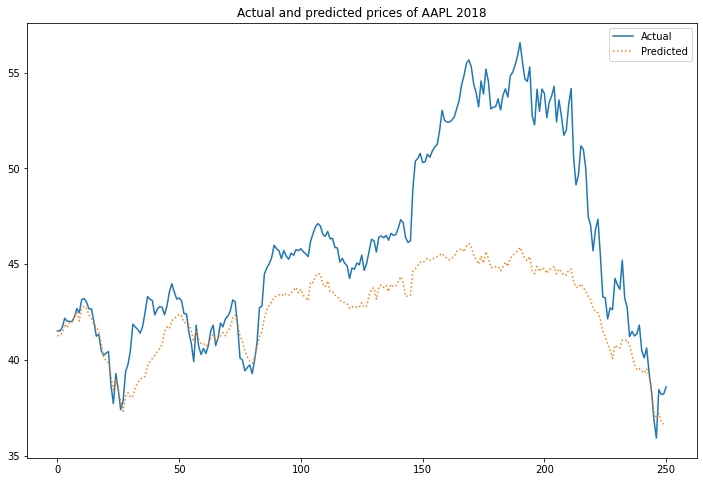

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title('Actual and predicted prices of AAPL 2018')
plt.plot(actual, label='Actual')
plt.plot(predictions, linestyle='dotted', label='Predicted')
plt.legend();

# Credit card payment default prediction with Keras

## Obtaining the dataset

In [42]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Worlddatascience/DataSamples/master/default_cc_clients.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [44]:
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


## Splitting and scaling the data

In [56]:
feature_columns= df.columns[:-1]
features = df.loc[:, feature_columns]
target = df.loc[:, 'default payment next month']

In [57]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.20, random_state=0)

In [58]:
import numpy as np

train_x, train_y = np.array(train_features), np.array(train_target)
test_x, test_y = np.array(test_features), np.array(test_target)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_x = scaler.fit_transform(train_x)
test_scaled_x = scaler.transform(test_x)

## Designing a deep neural network with 5 hidden layers using Keras

In [62]:
from tensorflow.keras import Sequential




In [64]:
from tensorflow.python.keras.layers import Input, Dense

In [67]:
from tensorflow.keras.layers import Dropout

In [69]:
from tensorflow.python.keras.layers.normalization import BatchNormalization


In [70]:

num_features = train_scaled_x.shape[1]

model = Sequential()
model.add(Dense(80, input_dim=num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                1920      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4

In [74]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
from tensorflow.python.keras.callbacks import History 

callback_history = History()

model.fit(
    train_scaled_x, train_y,
    validation_split=0.2,
    epochs=100, 
    callbacks=[callback_history]
)

Train on 19200 samples, validate on 4800 samples
Epoch 1/100
19200/19200 [==============================] - 2s 87us/sample - loss: 0.5014 - acc: 0.7773 - val_loss: 0.4626 - val_acc: 0.8040
Epoch 2/100
19200/19200 [==============================] - 2s 88us/sample - loss: 0.4614 - acc: 0.8056 - val_loss: 0.4585 - val_acc: 0.8065
Epoch 3/100
19200/19200 [==============================] - 2s 84us/sample - loss: 0.4541 - acc: 0.8108 - val_loss: 0.4555 - val_acc: 0.8117
Epoch 4/100
19200/19200 [==============================] - 2s 83us/sample - loss: 0.4505 - acc: 0.8124 - val_loss: 0.4530 - val_acc: 0.8117
Epoch 5/100
19200/19200 [==============================] - 2s 81us/sample - loss: 0.4492 - acc: 0.8144 - val_loss: 0.4515 - val_acc: 0.8119
Epoch 6/100
19200/19200 [==============================] - 2s 82us/sample - loss: 0.4467 - acc: 0.8127 - val_loss: 0.4530 - val_acc: 0.8110
Epoch 7/100
19200/19200 [==============================] - 2s 80us/sample - loss: 0.4467 - acc: 0.8165 - val_lo

## Measuring the performance of our model

In [85]:
test_loss, test_acc = model.evaluate(test_scaled_x, test_y)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

6000/6000 [==============================] - 0s 30us/sample - loss: 0.4286 - acc: 0.8255
Test loss: 0.42861518454551695
Test accuracy: 0.8255


### Running risk metrics

In [93]:
predictions = model.predict(test_scaled_x)
pred_values = predictions.round().ravel()

In [94]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_y, pred_values)

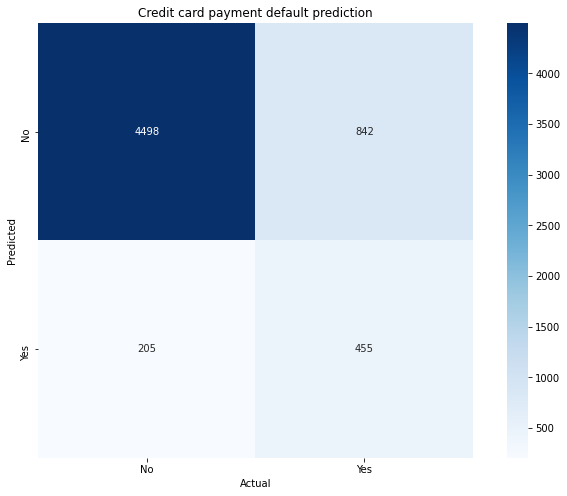

In [95]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

flags = ['No', 'Yes']
plt.subplots(figsize=(12,8))
sns.heatmap(matrix.T, square=True, annot=True, fmt='g', cbar=True, 
    cmap=plt.cm.Blues, xticklabels=flags, yticklabels=flags)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Credit card payment default prediction');

In [96]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
actual, predicted = test_y, pred_values
print('accuracy_score:', accuracy_score(actual, predicted))
print('precision_score:', precision_score(actual, predicted))
print('recall_score:', recall_score(actual, predicted))
print('f1_score:', f1_score(actual, predicted))    

accuracy_score: 0.8255
precision_score: 0.6893939393939394
recall_score: 0.3508095605242868
f1_score: 0.4649974450689831


### Displaying recorded events in Keras History

In [97]:
train_acc = callback_history.history['acc']
val_acc = callback_history.history['val_acc']
train_loss = callback_history.history['loss']
val_loss = callback_history.history['val_loss']

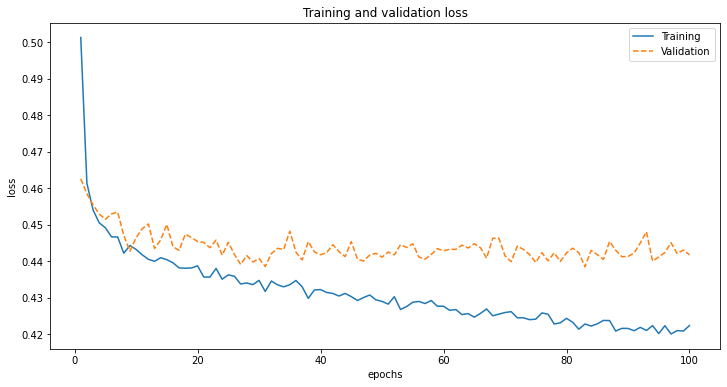

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(train_acc)+1)

plt.figure(figsize=(12,6))
plt.plot(epochs, train_loss, label='Training')
plt.plot(epochs, val_loss, '--', label='Validation')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

<Figure size 432x288 with 0 Axes>

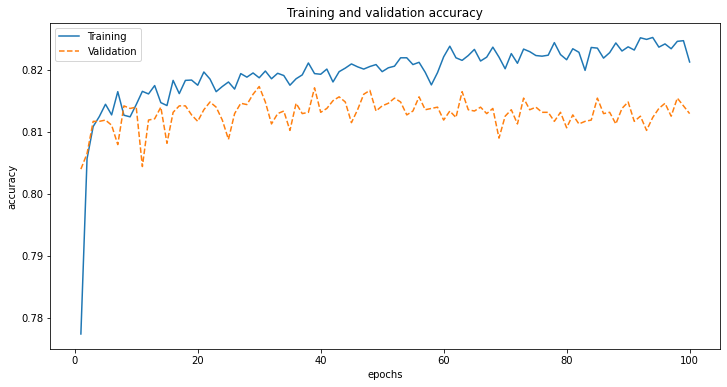

In [99]:
plt.clf()  # Clear the figure
plt.figure(figsize=(12,6))
plt.plot(epochs, train_acc, '-', label='Training')
plt.plot(epochs, val_acc, '--', label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();